# Road conditions (including many cases)
**Case 1**: Multiple jumps with white noises

**Case 2**: Multiple bumps with white noises

**Case 3**: Ramps with white noises

In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Filtered Noise (Smooth Random Bumps)
def low_pass_filter(data, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

# Define road profile parameters
x = np.linspace(0, 50000, 500000)  # 10000 meters, 100000 points
dx = x[1] - x[0]  # Spatial step

profile = np.zeros_like(x)  # Initialize flat road


## Road with white noises and jumps 

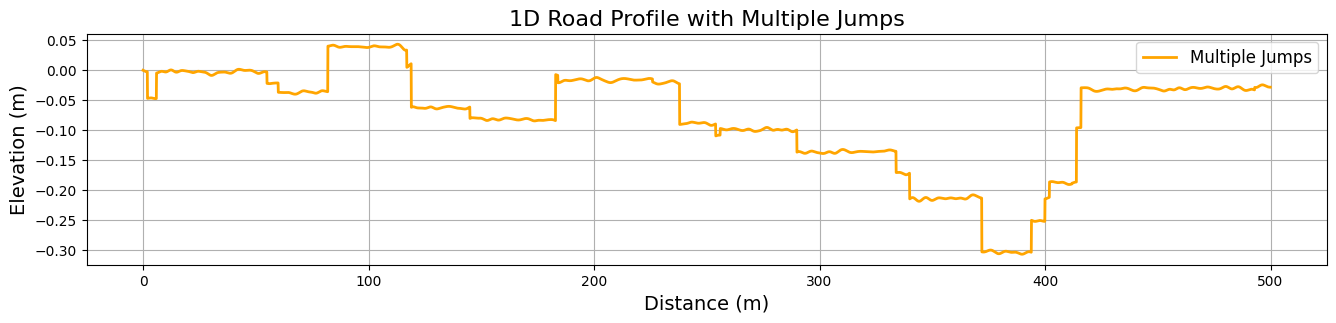

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Define the ranges
start_points = range(1, 5001, 100)  # Starting points of ranges: 1, 101, ..., 49901
end_points = range(100, 5001, 100)  # Ending points of ranges: 100, 200, ..., 50000

# Initialize an array to store the random numbers
random_numbers = []

# Loop through the ranges and pick 5 random numbers from each range
for start, end in zip(start_points, end_points):
    random_numbers += random.sample(range(start, end + 1), 5)  # +1 to include `end`

# np.random.seed(42)  # For reproducibility
noise_amplitude = 0.01
white_noise = noise_amplitude * np.random.normal(size=5000)
cutoff_frequency = 0.2  # Hz equivalent (smooth variations over space)
filtered_noise = low_pass_filter(white_noise, cutoff_frequency, fs=1/dx)

# Define jump parameters
jump_positions = random_numbers # Positions of jumps in meters
jump_heights = 0.05*np.random.normal(size=100)  # Heights of the jumps (positive or negative)
# plt.figure()
# plt.hist(jump_heights, color='skyblue', edgecolor='black')

profile = np.zeros_like(x)  # Initialize flat road
# Generate jumps
for pos, height in zip(jump_positions, jump_heights):
    # Find the index corresponding to the jump position
    index = np.argmin(np.abs(x - pos))
    profile[index:] += height  # Apply the jump to all subsequent points

profile[0:5000] = profile[0:5000] + filtered_noise

# Plot the road profile
plt.figure(figsize=(16, 3))
plt.plot(x[0:5000], profile[0:5000], label="Multiple Jumps", linewidth=2, color="orange")
plt.title("1D Road Profile with Multiple Jumps", fontsize=16)
plt.xlabel("Distance (m)", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# # Save the profile to a CSV file
# np.savetxt("road_profile_multiple_jumps.csv", profile, delimiter=",")

## Road with white noises and sinusoidal bumps

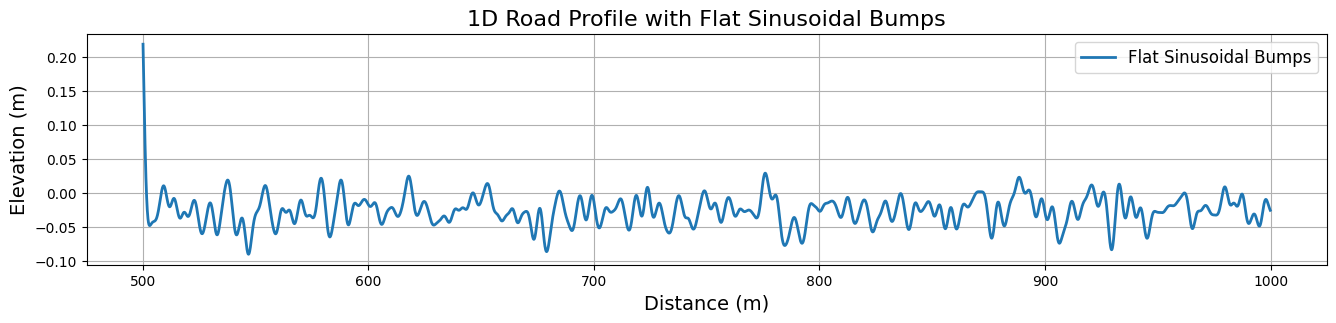

In [3]:
import numpy as np
import matplotlib.pyplot as plt


# Define bump parameters
bump_positions = []
for i in range(100):
    bump_positions.append(5000+100*i+40)
    bump_positions.append(5000+100*i+80)
    # Center positions of the bumps in meters

bump_width = 5  # Width of each bump in meters (half-length of the flat sinusoid)
bump_height = 0.2  # Maximum height of each bump
profile_sin = profile[5000]*np.ones_like(x)  # Initialize flat road
# Generate bumps
for pos in bump_positions:
    # Define the range for the bump
    start = pos - bump_width / 2
    end = pos + bump_width / 2
    # Create a flat sinusoidal bump within the range
    mask = (x >= start) & (x <= end)
    profile_sin[mask] = profile[5000]+bump_height * np.sin(
        np.pi * (x[mask] - start) / (end - start)
    )

noise_amplitude = 0.1
white_noise = noise_amplitude * np.random.normal(size=5000)
cutoff_frequency = 0.2  # Hz equivalent (smooth variations over space)
filtered_noise = low_pass_filter(white_noise, cutoff_frequency, fs=1/dx)

profile_sin[5001:10001] = profile_sin[5001:10001] + filtered_noise


# Plot the road profile
plt.figure(figsize=(16, 3))
plt.plot(x[5001:10000], profile_sin[5001:10000], label="Flat Sinusoidal Bumps", linewidth=2)
plt.title("1D Road Profile with Flat Sinusoidal Bumps", fontsize=16)
plt.xlabel("Distance (m)", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

# # Save the profile to a CSV file
# np.savetxt("road_profile_flat_sinusoidal.csv", profile, delimiter=",")


In [4]:
profile[5000:10001] = profile_sin[5000:10001]

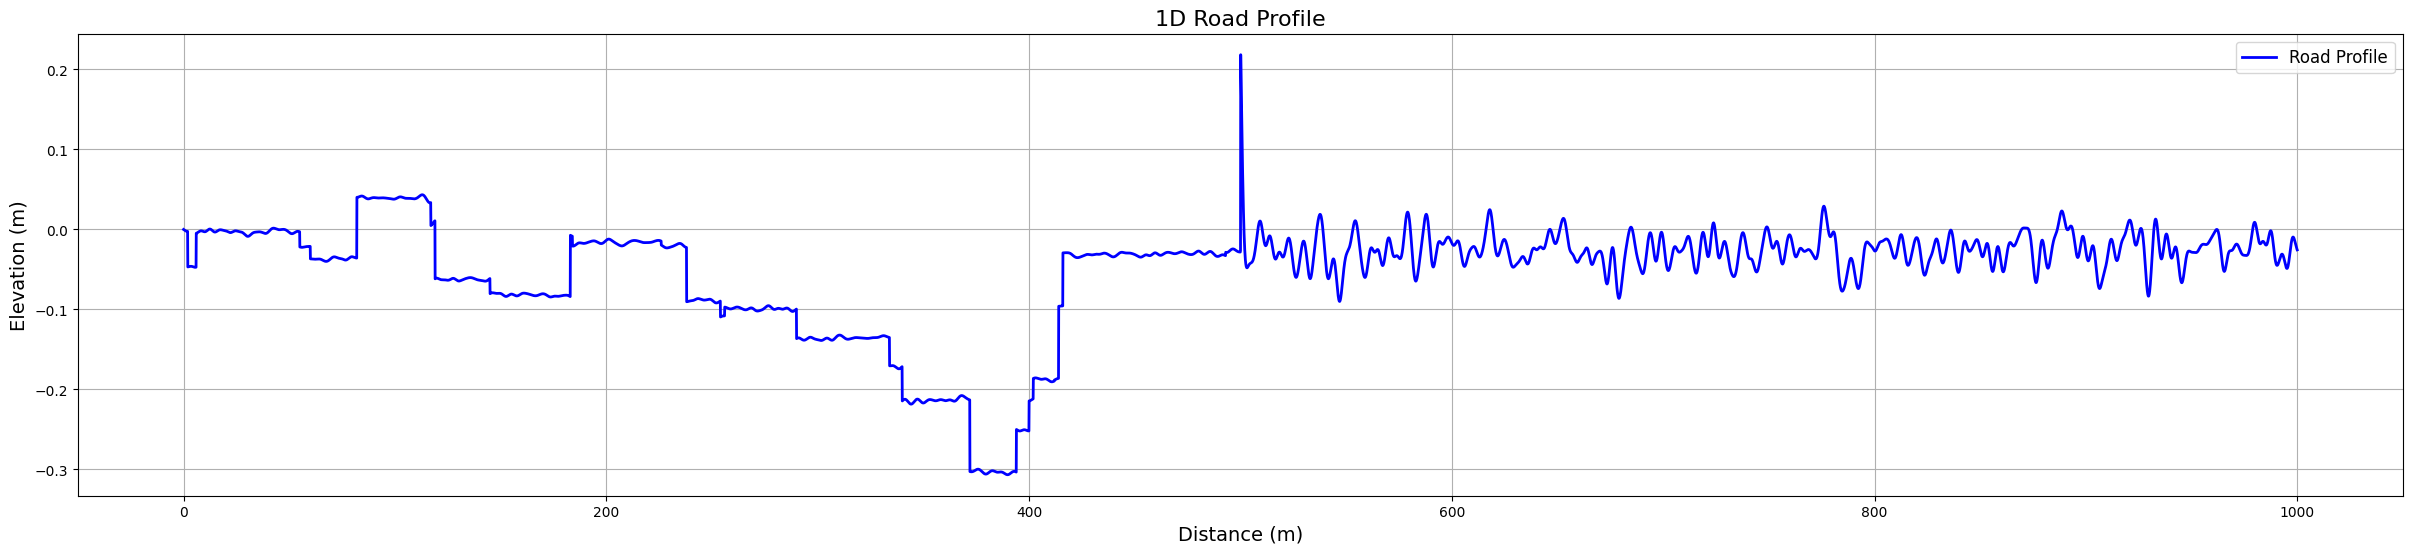

In [5]:
# Plot the road profile
plt.figure(figsize=(30, 6))
plt.plot(x[0:10000], profile[0:10000], label="Road Profile", linewidth=2, color="blue")
plt.title("1D Road Profile", fontsize=16)
plt.xlabel("Distance (m)", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

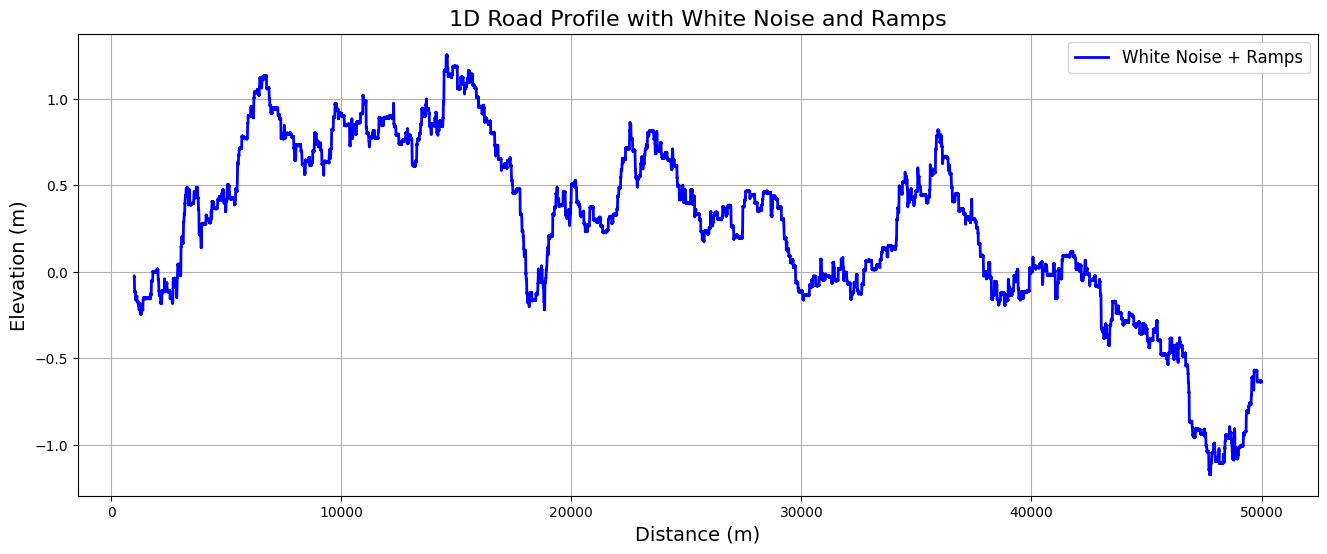

In [6]:
import numpy as np
import matplotlib.pyplot as plt


# 1. White Noise
# np.random.seed(42)  # For reproducibility
noise_amplitude = 0.01
white_noise = noise_amplitude * np.random.normal(size=x.size)
cutoff_frequency = 0.2  # Hz equivalent (smooth variations over space)
filtered_noise = low_pass_filter(white_noise, cutoff_frequency, fs=1/dx)

# 2. Ramps (Up and Down)
# Generate 1000 random start positions for ramps
min_val = 1001
max_val = 50000
random_start_positions = random.sample(range(min_val, max_val - 10), 1000)  # -10 to ensure space for ramp end

# Create ramp positions as tuples (start, end)
ramp_positions = [(start, start + 10) for start in random_start_positions]  # End value set to start + 10

ramp_heights = 0.05 * np.random.normal(size=1000)  # Heights of the ramps (positive for up, negative for down)

profile_ramp = profile[10000]*np.ones_like(x)  # Initialize flat road
# Add ramps to the profile
for (start, end), height in zip(ramp_positions, ramp_heights):
    # Create a ramp smoothly transitioning between start and end
    mask = (x >= start) & (x <= end)
    ramp = height * (x[mask] - start) / (end - start)
    profile_ramp[mask] += ramp
    # Ensure continuity at the end of the ramp
    profile_ramp[x > end] += height

# Add white noise to the profile
profile_ramp += filtered_noise

# Plot the road profile
plt.figure(figsize=(16, 6))
plt.plot(x[10001:-1], profile_ramp[10001:-1], label="White Noise + Ramps", linewidth=2, color="blue")
plt.title("1D Road Profile with White Noise and Ramps", fontsize=16)
plt.xlabel("Distance (m)", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


In [7]:
profile[10001:] = profile_ramp[10001:]

# Save the profile to a CSV file
# np.savetxt("road_profile.csv", profile, delimiter=",")

## Plot all profile

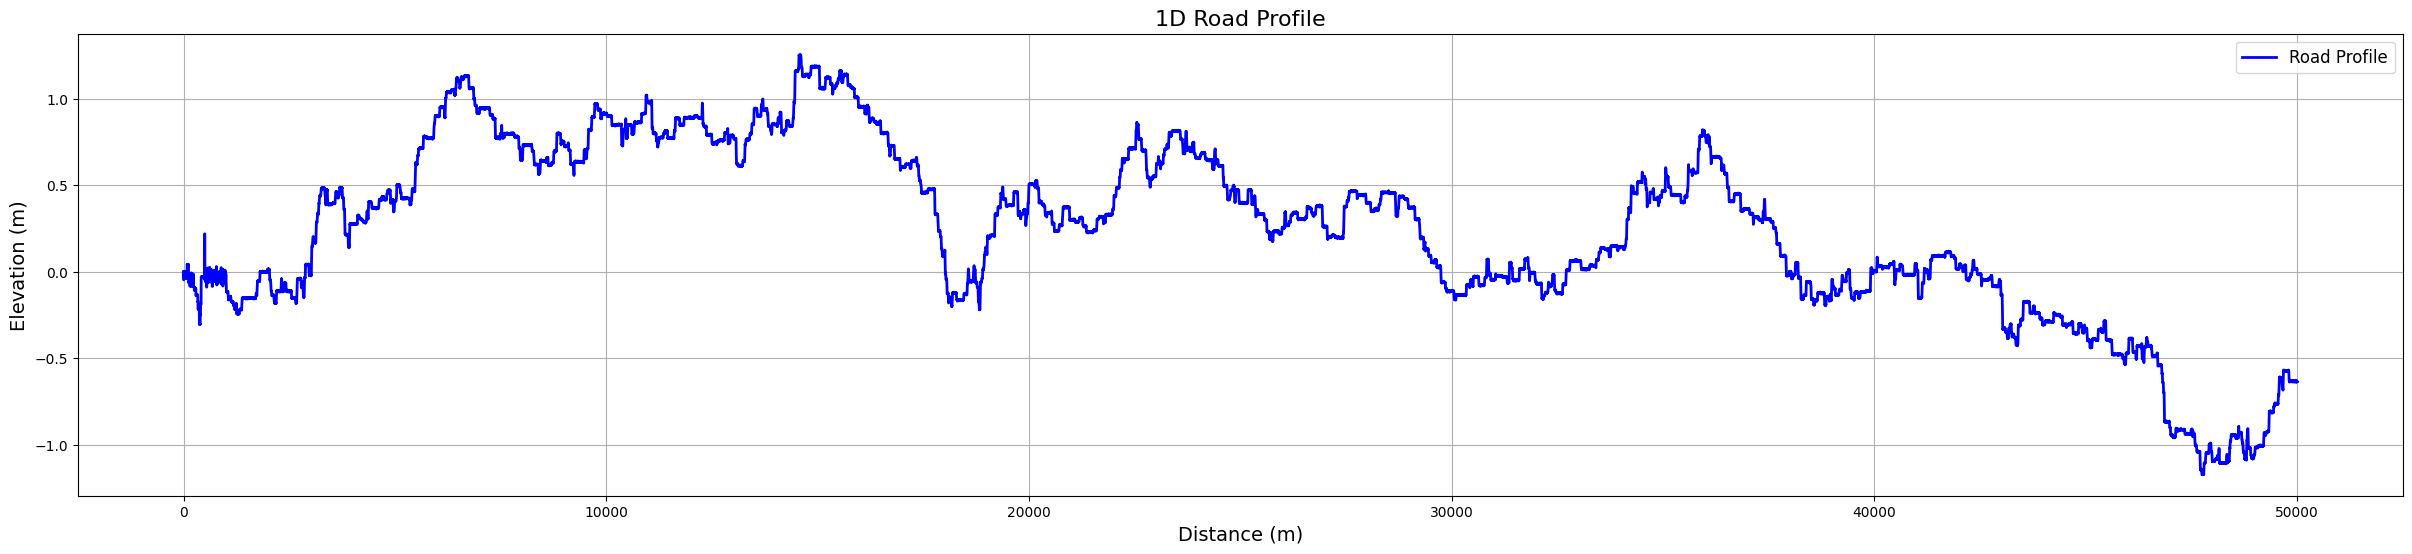

In [8]:
# Plot the road profile
plt.figure(figsize=(30, 6))
plt.plot(x, profile, label="Road Profile", linewidth=2, color="blue")
plt.title("1D Road Profile", fontsize=16)
plt.xlabel("Distance (m)", fontsize=14)
plt.ylabel("Elevation (m)", fontsize=14)
# plt.axis('equal')
plt.grid(True)
plt.legend(fontsize=12)
plt.show()

## Save the road profile

In [10]:
import pandas as pd

# Create DataFrame from the two arrays
df = pd.DataFrame({
    'x': x,
    'z': profile
})
df.to_csv("road_profile2.csv", index=False)


## Load Speed Data

       time     speed
0  0.000000  2.261867
1  0.050003  2.262589
2  0.100006  2.264018
3  0.150009  2.266167
4  0.200011  2.269017
       time     speed  distance
0  0.000000  2.261867  0.000000
1  0.050003  2.262589  0.113118
2  0.100006  2.264018  0.226290
3  0.150009  2.266167  0.339551
4  0.200011  2.269017  0.452937
          x         z     dz_dx
0  0.000000  0.010891 -0.010277
1  0.100000  0.009863 -0.010095
2  0.200000  0.008854 -0.009860
3  0.300001  0.007868 -0.009573
4  0.400001  0.006911 -0.009239
       time     speed  distance     dz_dt
0  0.000000  2.261867  0.000000 -0.023245
1  0.050003  2.262589  0.113118 -0.022772
2  0.100006  2.264018  0.226290 -0.022152
3  0.150009  2.266167  0.339551 -0.021394
4  0.200011  2.269017  0.452937 -0.020511


/tmp/ipykernel_3171116/2084751204.py:35: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  profile_data["dz_dx"].iloc[-1] = profile_data["dz_dx"].iloc[-2]  # Fill the last row with the previous value


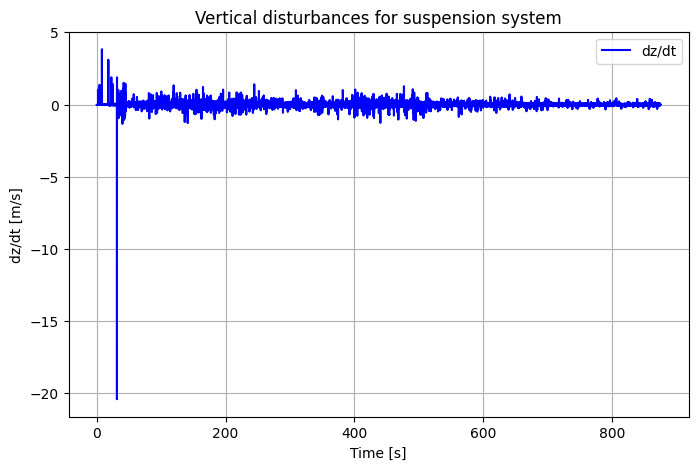

In [11]:
import pandas as pd

# Load the CSV file
# df = pd.read_csv("speed_data_aggressive_driver1.csv")  # Speed profile for aggressive driver
df = pd.read_csv("speed_data_mild_driver1.csv")  # Speed profile for mild driver

# Display the first few rows
print(df.head())


# Initialize the distance array
dis = [0]  # Start with zero distance at the first time step

# Compute the distance for each time step using the trapezoidal rule
for i in range(1, len(df)):
    dt = df.loc[i, "time"] - df.loc[i - 1, "time"]  # Time step
    avg_speed = 0.5 * (df.loc[i, "speed"] + df.loc[i - 1, "speed"])  # Trapezoidal rule
    dis.append(dis[-1] + avg_speed * dt)  # Cumulative sum

# Add distance to DataFrame
df["distance"] = dis

# Display the first few rows
print(df.head())


# Convert to DataFrame
profile_data = pd.DataFrame({"x": x, "z": profile})


# Compute the change in height (slope) using forward difference
profile_data["dz_dx"] = (profile_data["z"].shift(-1) - profile_data["z"]) / (profile_data["x"].shift(-1) - profile_data["x"])

# The last row will have NaN since there's no (i+1) for the last point, so we fill it with 0 (or another method)
profile_data["dz_dx"].iloc[-1] = profile_data["dz_dx"].iloc[-2]  # Fill the last row with the previous value

# Display the first few rows
print(profile_data.head())

df["dz_dt"] = np.interp(df["distance"], profile_data["x"], profile_data["dz_dx"])*df["speed"]
# Display the first few rows
print(df.head())

# Plot the data
plt.figure(figsize=(8, 5))  # Set figure size
plt.plot(df["time"], df["dz_dt"], linestyle="-", color="b", label="dz/dt")

# Labels and title
plt.xlabel("Time [s]")
plt.ylabel("dz/dt [m/s]")
plt.title("Vertical disturbances for suspension system")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



In [12]:
# Calculate the mean and standard deviation for a specific column
mean_value = df["dz_dt"].mean()
std_value = df["dz_dt"].std()

# Print the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_value}")


# df.to_csv("dz_dt_aggressive_driver1.csv", columns=["dz_dt"], index=False)
df.to_csv("dz_dt_mild_driver1_test.csv", columns=["dz_dt"], index=False)


print(df["distance"])

Mean: 0.001668934330555066
Standard Deviation: 0.22629738797401328
0            0.000000
1            0.113118
2            0.226290
3            0.339551
4            0.452937
             ...     
17495    47696.610464
17496    47698.062270
17497    47699.514045
17498    47700.965799
17499    47702.417538
Name: distance, Length: 17500, dtype: float64
